# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exrate=pd.read_csv('exch_rates.csv')
exrate.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [3]:
exrate.Frequency=pd.to_datetime(exrate.Frequency)
exrate.set_index('Frequency',inplace=True)

Plot the three exchange rates in one plot

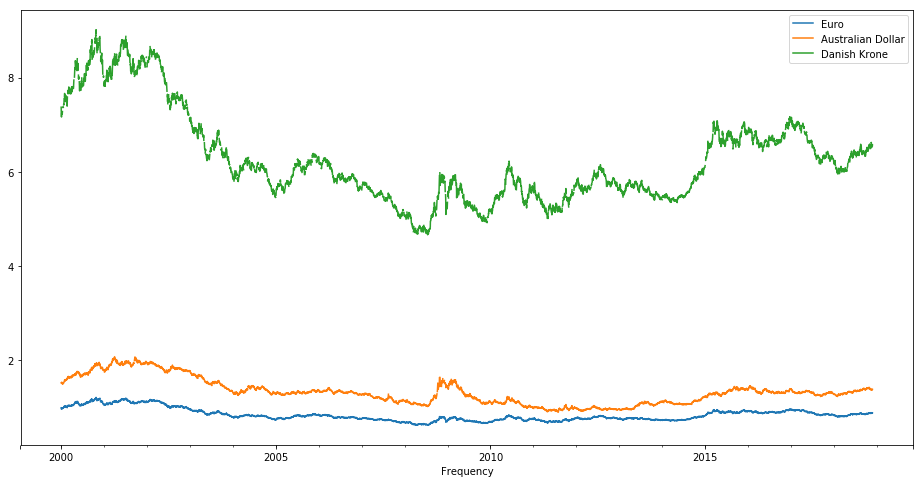

In [4]:
exrate.plot(figsize=(16,8))

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [5]:
exrate.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

very highly correlated amongst all currencies
krone actually peggedto euro. correlation should equal 1 but rounding errors exist

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

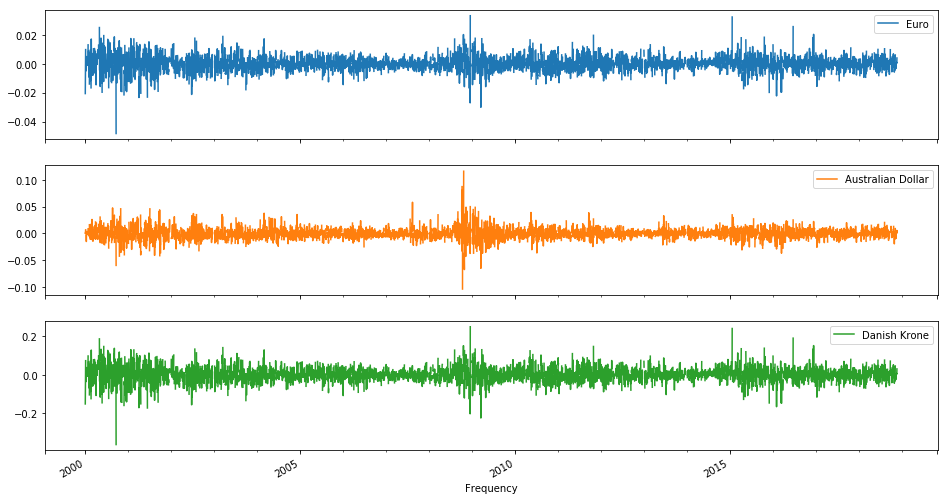

In [6]:
# your code here
exrate_diff=exrate.diff()
exrate_diff.plot(subplots=True,figsize=(16,9))
plt.show()

In [7]:
# your code here

In [8]:
# your code here

### Explain what's going on

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

<i> i did this on the euro-aud difference, solution does this solely on euro rate (I misunderstood)

In [9]:
euro_aud=exrate.Euro- exrate['Australian Dollar']
euro_aud_lag1=euro_aud.shift(periods=1)
lag1_df=pd.concat([euro_aud_lag1,euro_aud],axis=1)
lag1_df.columns=(['Euro-Aud lag1','Euro-Aud'])
lag1_df.corr()

,Euro-Aud lag1,Euro-Aud
Euro-Aud lag1,1.000000,0.998599
Euro-Aud,0.998599,1.000000


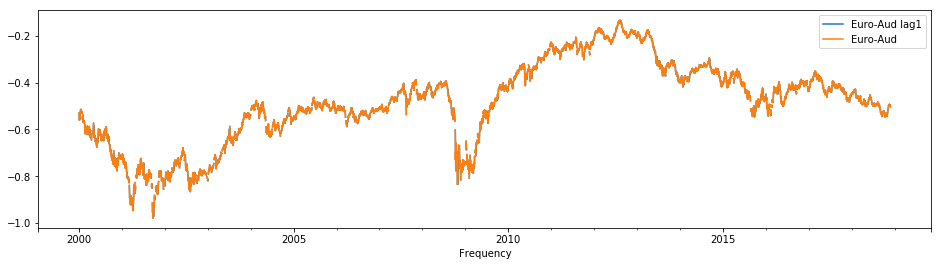

In [10]:
lag1_df.plot(figsize=(16,4))

In [11]:
# your code here

In [12]:
# your code here

Repeat this, but for a "lag 50 autocorrelation"

In [13]:
euro_aud=exrate.Euro- exrate['Australian Dollar']
euro_aud_lag5=euro_aud.shift(periods=50)
lag5_df=pd.concat([euro_aud_lag5,euro_aud],axis=1)
lag5_df.columns=(['Euro-Aud lag5','Euro-Aud'])
lag5_df.corr()

,Euro-Aud lag5,Euro-Aud
Euro-Aud lag5,1.000000,0.957096
Euro-Aud,0.957096,1.000000


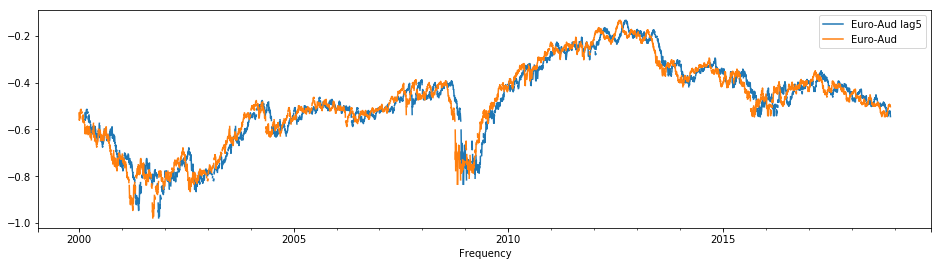

In [14]:
lag5_df.plot(figsize=(16,4))

### What's your conclusion here?

Knowing this, let's plot the ACF now.

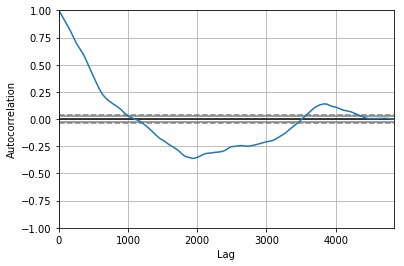

In [15]:
pd.plotting.autocorrelation_plot(exrate['Euro'].dropna())

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5


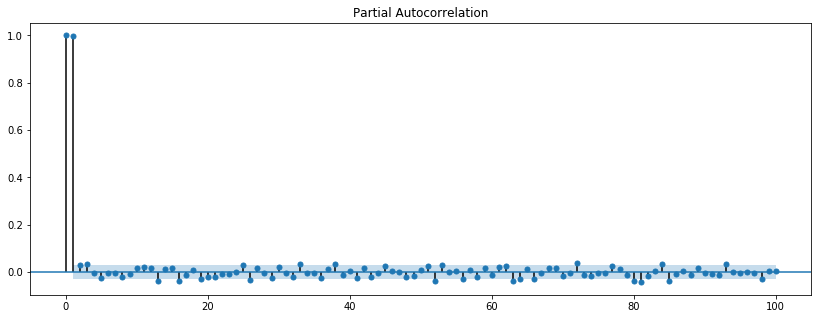

In [17]:
plot_pacf(exrate['Euro'].dropna(),lags=100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [18]:
passengers=pd.read_csv('passengers.csv')
passengers.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [19]:
passengers.Month=pd.to_datetime(passengers.Month)
passengers.set_index('Month',inplace=True)
passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


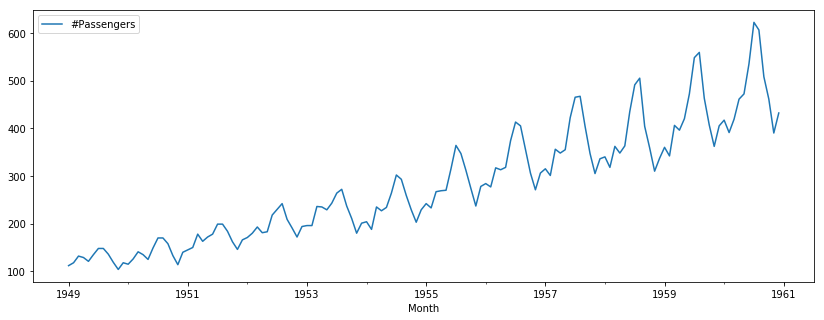

In [20]:
passengers.plot()

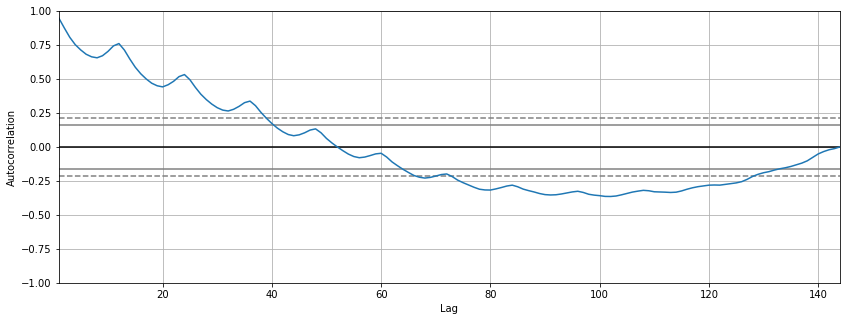

In [21]:
pd.plotting.autocorrelation_plot(passengers)

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


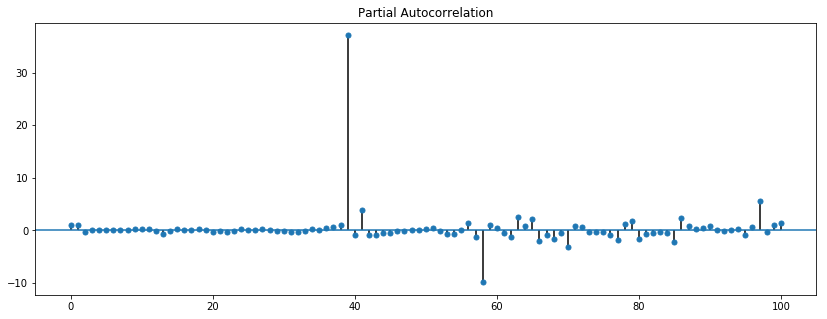

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plot_pacf(passengers.dropna(), lags = 100);

In [23]:
pass_diff=passengers.diff(periods=1)


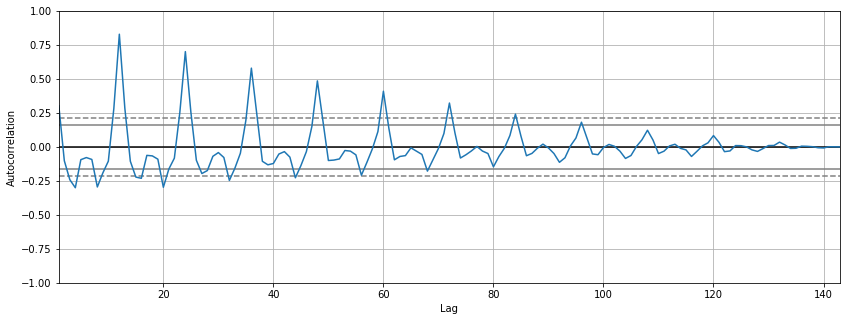

In [24]:
pd.plotting.autocorrelation_plot(pass_diff.dropna())

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


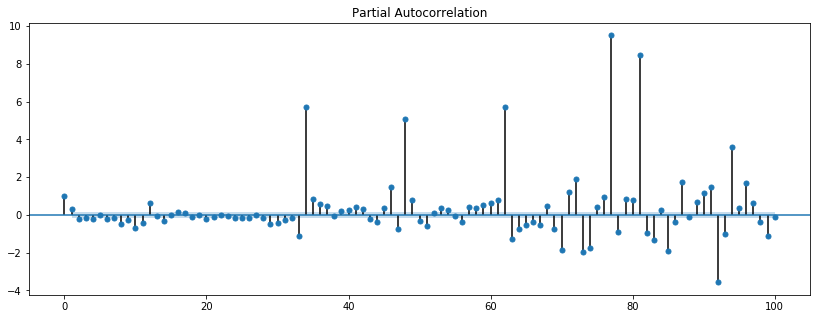

In [25]:
plot_pacf(pass_diff.dropna(),lags=100);

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [26]:
# your code here
nyse=pd.read_csv('NYSE_monthly.csv')
nyse.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [27]:
nyse.Month=pd.to_datetime(nyse.Month)
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


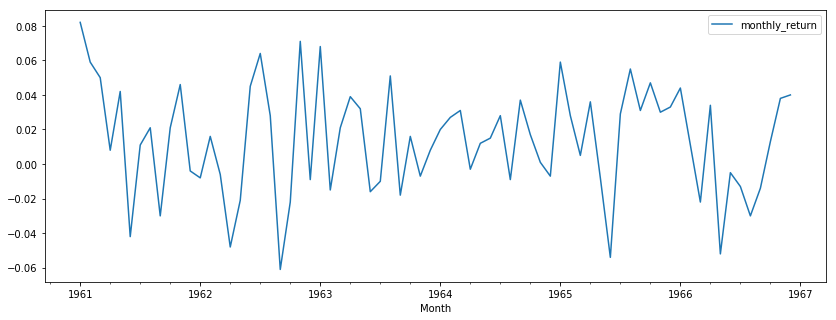

In [28]:
nyse.plot()

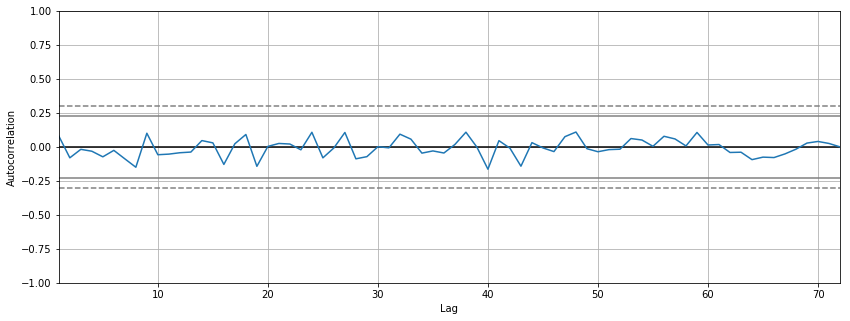

In [29]:
pd.plotting.autocorrelation_plot(nyse)

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


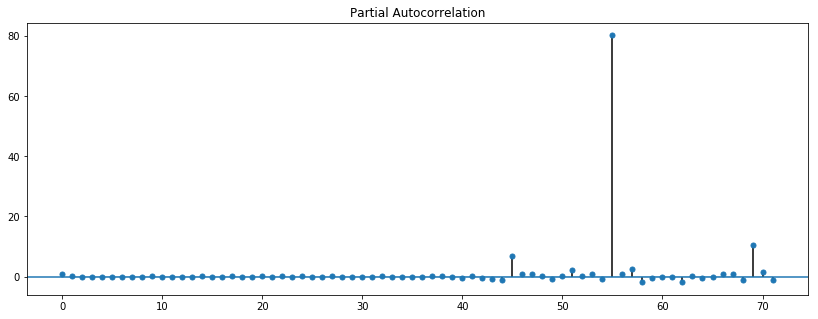

In [30]:
plot_pacf(nyse.dropna());

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!